## **WORKSHOP 003 - NOTEBOOK #3: Model Performance / Metrics**

### **Setting Environment**

In [25]:
import os 
print(os.getcwd())

try:
    os.chdir("../../workshop-003")

except FileNotFoundError:
    print("""
        FileNotFoundError - The directory may not exist or you might not be in the specified path.
        If this has already worked, do not run this block again, as the current directory is already set to workshop-003.
        """)
    
print(os.getcwd())

d:\U\FIFTH SEMESTER\ETL\workshop-003

        FileNotFoundError - The directory may not exist or you might not be in the specified path.
        If this has already worked, do not run this block again, as the current directory is already set to workshop-003.
        
d:\U\FIFTH SEMESTER\ETL\workshop-003


### **Importing modules and libraries**

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import joblib
from data.database.db_wh import get_happiness_data
import seaborn as sns

### **Load Saved Model and Data**

#### **Load the saved model**

In [27]:
model = joblib.load("./model/alternative_rf_model.pkl")
print("Model loaded successfully from ./model/alternative_rf_model.pkl")

Model loaded successfully from ./model/alternative_rf_model.pkl


#### **Load the streamed data**

In [28]:
#df = pd.read_csv("./data/processed/world_happiness_report.csv")
#print("Data loaded successfully from ./data/processed/world_happiness_report.csv")

db_df = get_happiness_data()
print("Data loaded successfully from the PostgreSQL database.")
print("Initial db_df columns:", db_df.columns.tolist())  #Debug: Check available columns
db_df.head()

Attempting to connect to the database...
Successfully connected to the database!
Table created successfully!
Attempting to connect to the database...
Successfully connected to the database!
Data successfully obtained
Data loaded successfully from the PostgreSQL database.
Initial db_df columns: ['id', 'year', 'social_support', 'gdp_per_capita', 'healthy_life_expectancy', 'freedom', 'generosity', 'government_corruption', 'continent_North_America', 'continent_Central_America', 'continent_South_America', 'happiness_score', 'predicted_happiness_score']


,id,year,social_support,gdp_per_capita,healthy_life_expectancy,freedom,generosity,government_corruption,continent_North_America,continent_Central_America,continent_South_America,happiness_score,predicted_happiness_score
0,86,2018,1.17400,0.68200,0.42900,0.58000,0.59800,0.17800,0,0,0,4.308,4.82343
1,94,2016,0.60323,0.27509,0.29981,0.15412,0.18270,0.18437,0,0,0,3.956,3.87244
2,102,2016,0.14866,0.74719,0.62994,0.06912,0.48397,0.17233,0,0,0,3.069,4.14134
3,110,2015,1.08393,1.39541,0.72025,0.31048,0.13706,0.32524,0,0,0,6.411,6.25703
4,118,2016,0.86758,1.64555,0.94719,0.48770,0.32706,0.46987,0,0,0,6.739,6.31604


### **Data Preprocessing**

In [29]:
X_db = db_df.drop(['happiness_score', 'predicted_happiness_score', 'year'], axis=1, errors='ignore')
y_db_actual = db_df['happiness_score']
y_db_predicted = db_df['predicted_happiness_score']

In [30]:
model_features = model.feature_names_in_
X_db = X_db.reindex(columns=model_features, fill_value=0)

In [31]:
print("Expected model features:", model_features)
print("X_db columns after reindexing:", X_db.columns.tolist())

Expected model features: ['year' 'gdp_per_capita' 'health_life_expectancy' 'social_support'
 'freedom' 'government_corruption' 'generosity' 'continent_Africa'
 'continent_America' 'continent_Asia' 'continent_Central_America'
 'continent_Europe' 'continent_North_America' 'continent_Oceania'
 'continent_South_America']
X_db columns after reindexing: ['year', 'gdp_per_capita', 'health_life_expectancy', 'social_support', 'freedom', 'government_corruption', 'generosity', 'continent_Africa', 'continent_America', 'continent_Asia', 'continent_Central_America', 'continent_Europe', 'continent_North_America', 'continent_Oceania', 'continent_South_America']


In [32]:
dummy_cols = [col for col in model_features if col.startswith('continent_')]
existing_dummy_cols = [col for col in dummy_cols if col in db_df.columns]
print("Dummy variable values in db_df (for existing columns):")
for col in existing_dummy_cols:
    print(f"{col}: {db_df[col].sum()}")

Dummy variable values in db_df (for existing columns):
continent_Central_America: 14
continent_North_America: 3
continent_South_America: 18


### **Performance Metrics**

#### **(R²) Coefficient of Determination**

In [33]:
r2 = r2_score(y_db_actual, y_db_predicted)
print("Alternative Random Forest Regression Model Results: \n")
print("Coefficient of determination (R^2) =", r2)

Alternative Random Forest Regression Model Results: 

Coefficient of determination (R^2) = 0.8639354474632066


#### **(MSE) Mean Squared Error**

In [34]:
mse = mean_squared_error(y_db_actual, y_db_predicted)
print("Alternative Random Forest Regression Model Results: \n")
print("Mean Squared Error (MSE) =", mse)

Alternative Random Forest Regression Model Results: 

Mean Squared Error (MSE) = 0.17210940183529697


#### **(MAE) Mean Absolute Error**

In [35]:
mae = mean_absolute_error(y_db_actual, y_db_predicted)
print("Alternative Random Forest Regression Model Results: \n")
print("Mean Absolute Error (MAE) =", mae)

Alternative Random Forest Regression Model Results: 

Mean Absolute Error (MAE) = 0.3246325519616792


#### **Explained Variance Score**

In [36]:
exp_var = explained_variance_score(y_db_actual, y_db_predicted)
print("Alternative Random Forest Regression Model Results: \n")
print("Explained Variance Score =", exp_var)

Alternative Random Forest Regression Model Results: 

Explained Variance Score = 0.8650314758832549


### **Visualisation**

In [37]:
sns.set_palette("flare")

#### **Actual vs Predicted Happiness Scores**

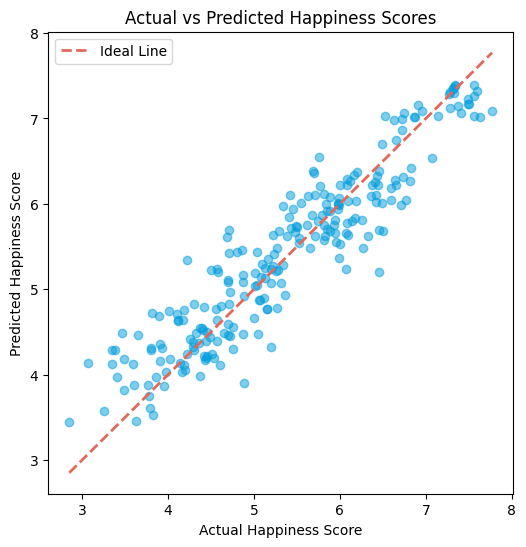

In [38]:
plt.figure(figsize=(6, 6))
plt.scatter(y_db_actual, y_db_predicted, alpha=0.5, color='#009DDC')
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title("Actual vs Predicted Happiness Scores")
min_val = min(y_db_actual.min(), y_db_predicted.min())
max_val = max(y_db_actual.max(), y_db_predicted.max())
plt.plot([min_val, max_val], [min_val, max_val], color=sns.color_palette()[1], linestyle='--', lw=2, label="Ideal Line")
plt.legend()
plt.show()

#### **Analysis by Continent: Average Predicted Happiness Score**

In [39]:
db_df['continent'] = np.select(
    [
        db_df['continent_North_America'] == 1,
        db_df['continent_Central_America'] == 1,
        db_df['continent_South_America'] == 1
    ],
    [
        'North America',
        'Central America',
        'South America'
    ],
    default='Other'
)

In [40]:
mean_happiness_score = db_df.groupby('continent')['predicted_happiness_score'].mean()

In [41]:
print("Continent distribution in db_df:")
print(db_df['continent'].value_counts())

Continent distribution in db_df:
continent
Other              200
South America       18
Central America     14
North America        3
Name: count, dtype: int64


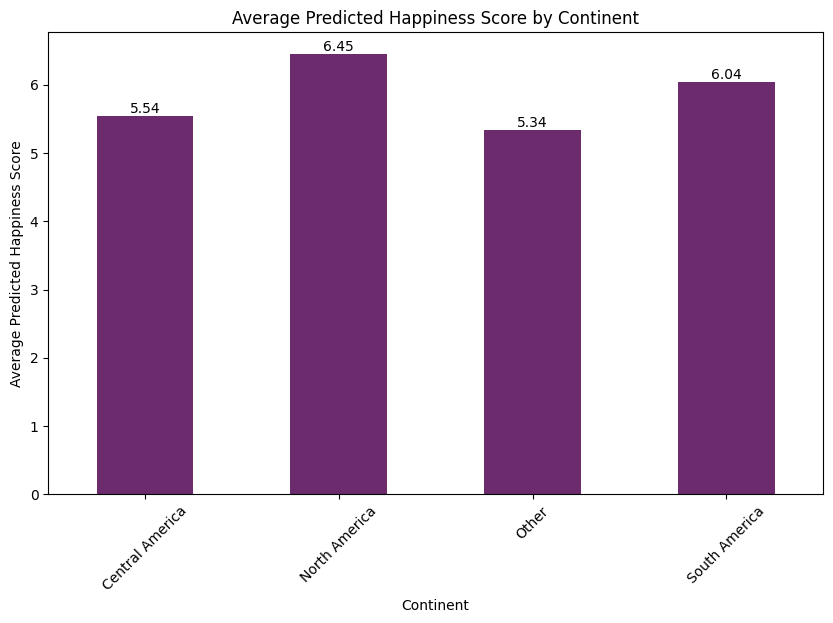

Average Predicted Happiness Score by Continent
continent
Central America    5.544421
North America      6.448847
Other              5.337529
South America      6.038931
Name: predicted_happiness_score, dtype: float64


In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = mean_happiness_score.plot(kind='bar', ax=ax, color=sns.color_palette()[5])
for bar in bars.containers:
    ax.bar_label(bar, fmt='%.2f', label_type='edge')
plt.title('Average Predicted Happiness Score by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Predicted Happiness Score')
plt.xticks(rotation=45)
plt.show()

print("Average Predicted Happiness Score by Continent")
print(mean_happiness_score)

#### **Average Happiness Score by Continent (Original vs Predicted)**

In [43]:
before_predict_data = pd.read_csv("./data/processed/world_happiness_report.csv")

In [44]:
valid_continents = db_df['continent'].unique()
before_predict_data = before_predict_data[before_predict_data['continent'].isin(valid_continents)]

print("Continents in before_predict_data (after filtering):", before_predict_data["continent"].unique())
print("Continents in db_df:", db_df["continent"].unique())

Continents in before_predict_data (after filtering): ['North America' 'Central America' 'South America']
Continents in db_df: ['Other' 'South America' 'Central America' 'North America']


In [45]:
avg_happiness_original = before_predict_data.groupby("continent")["happiness_score"].mean().reset_index()
avg_happiness_predicted = db_df.groupby("continent")["predicted_happiness_score"].mean().reset_index()

print("avg_happiness_original:\n", avg_happiness_original)
print("avg_happiness_predicted:\n", avg_happiness_predicted)

avg_happiness_original:
          continent  happiness_score
0  Central America         5.804705
1    North America         7.024867
2    South America         6.126091
avg_happiness_predicted:
          continent  predicted_happiness_score
0  Central America                   5.544421
1    North America                   6.448847
2            Other                   5.337529
3    South America                   6.038931


In [46]:
avg_happiness = pd.merge(avg_happiness_original, avg_happiness_predicted, on="continent")

print("Columns in avg_happiness:", avg_happiness.columns)

Columns in avg_happiness: Index(['continent', 'happiness_score', 'predicted_happiness_score'], dtype='object')


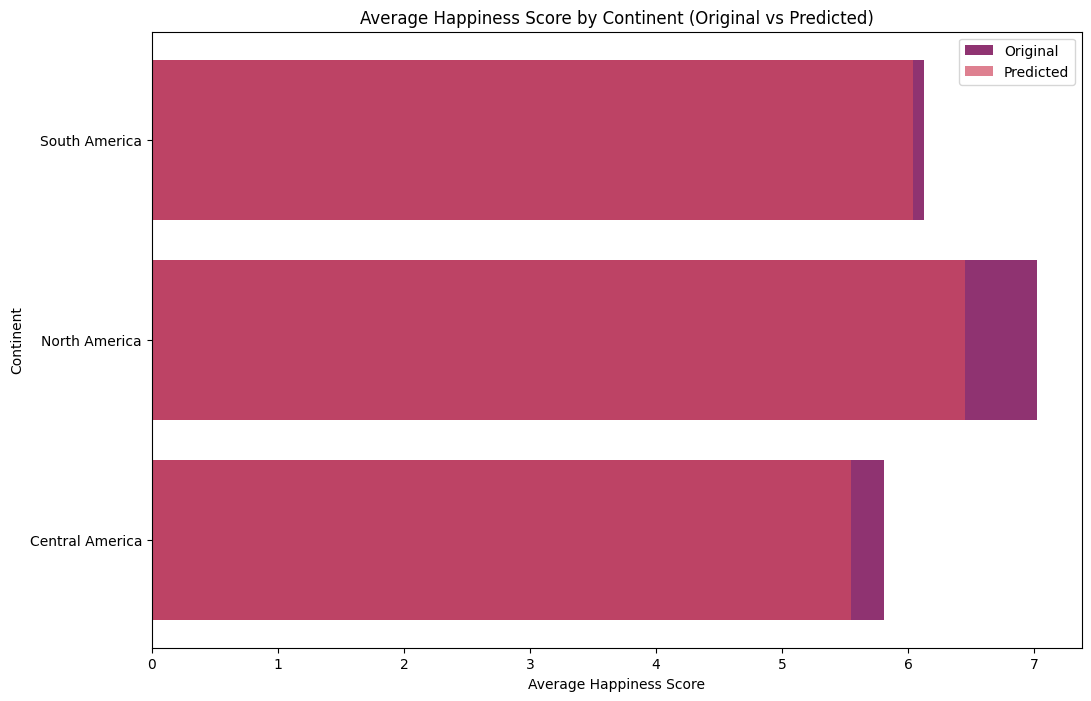

In [47]:
plt.figure(figsize=(12, 8))
plt.barh(avg_happiness["continent"], avg_happiness["happiness_score"], color=sns.color_palette()[4], label='Original')
plt.barh(avg_happiness["continent"], avg_happiness["predicted_happiness_score"], color=sns.color_palette()[2], alpha=0.7, label='Predicted')
plt.xlabel("Average Happiness Score")
plt.ylabel("Continent")
plt.title("Average Happiness Score by Continent (Original vs Predicted)")
plt.legend()
plt.show()

#### **Feature Importance**

C:\Users\sebas\AppData\Local\Temp\ipykernel_31200\3625344117.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=df_features, palette="crest")


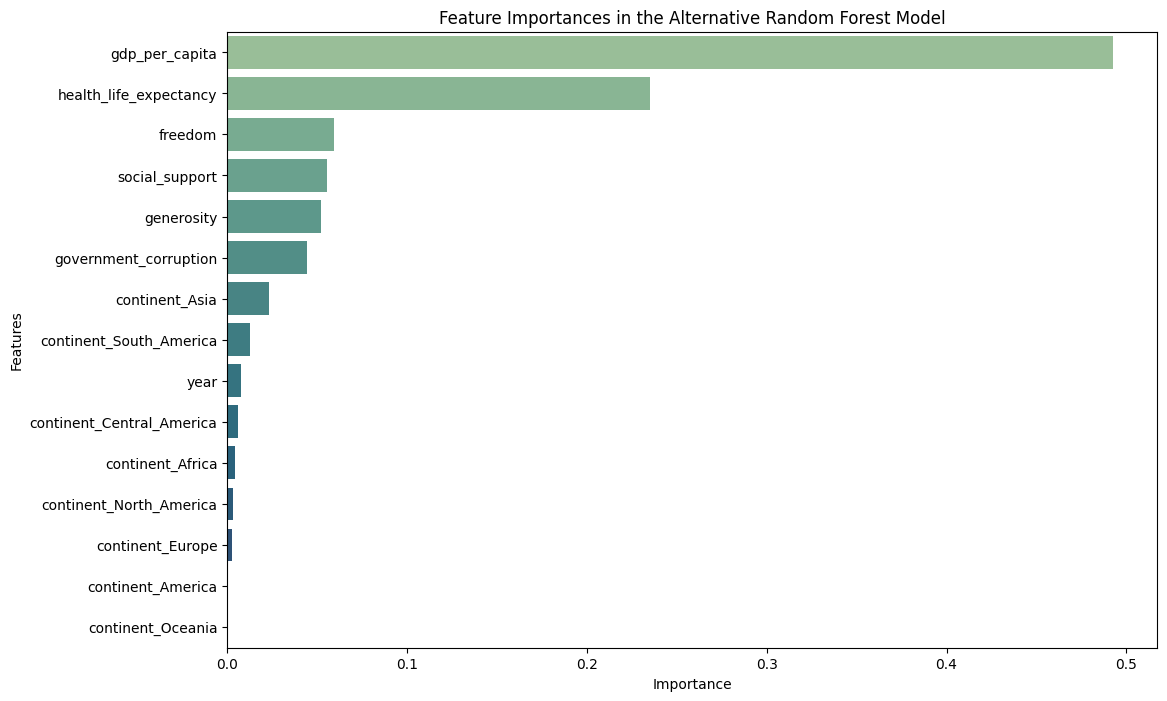

In [48]:
alt_rf_model_features = model.feature_names_in_
important_features = model.feature_importances_

df_features = pd.DataFrame({
    "Feature": alt_rf_model_features,
    "Importance": important_features
})

df_features = df_features.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=df_features, palette="crest")
plt.title("Feature Importances in the Alternative Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()